<a href="https://colab.research.google.com/github/norayehia/studentdata-analyses/blob/main/grades_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("/content/drive/MyDrive/NMU/bigdatagrades/CSE322-Fall24-25-review_quiz-grades.csv")

In [5]:
df.head(3)

,Surname,First name,Email address,Grade/15.00,Q. 1 /0.50,Q. 2 /0.50,Q. 3 /0.50,Q. 4 /0.50,Q. 5 /0.50,Q. 6 /0.50,...,Q. 21 /0.50,Q. 22 /0.50,Q. 23 /0.50,Q. 24 /0.50,Q. 25 /0.50,Q. 26 /0.50,Q. 27 /0.50,Q. 28 /0.50,Q. 29 /0.50,Q. 30 /0.50
0,Mohamed Galal Hagag,Ahmed,Ahmed221101071@nmu.edu.eg,15.0,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,Mahmoud Mohamed Ahmed Saleh,Mohamed,Mohamed221101062@nmu.edu.eg,15.0,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,Ehab Yehia Elgendy,Belal,Belal221101165@nmu.edu.eg,14.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [6]:
# Extract the ID portion from the email and add it as a new column
df['ID'] = df['Email address'].str.extract(r'(\d{9})')

print(df)

                         Surname First name                 Email address  \
0            Mohamed Galal Hagag      Ahmed     Ahmed221101071@nmu.edu.eg   
1    Mahmoud Mohamed Ahmed Saleh    Mohamed   Mohamed221101062@nmu.edu.eg   
2             Ehab Yehia Elgendy      Belal     Belal221101165@nmu.edu.eg   
3       Ashraf Ibrahim ELDesouky      Manar     Manar221101099@nmu.edu.eg   
4            Mohamed Abdo Yousef      Salma     Salma221101044@nmu.edu.eg   
..                           ...        ...                           ...   
74         Elsayed Wahid Elsayed      Basma     Basma221101038@nmu.edu.eg   
75    Mohamed Ibrahim ElSharkawi      Ahmed     Ahmed221101031@nmu.edu.eg   
76  eldesouki Abdullah eldesouki   Abdullah  Abdullah221101205@nmu.edu.eg   
77  Mohamed Abdelrahem Elbostamy    Mohamed   Mohamed221101061@nmu.edu.eg   
78               Overall average        NaN                           NaN   

    Grade/15.00 Q. 1 /0.50 Q. 2 /0.50 Q. 3 /0.50 Q. 4 /0.50 Q. 5 /0.50  \
0

In [9]:
df.isnull().sum()

,0
Surname,0
First name,1
Email address,1
Grade/15.00,0
Q. 1 /0.50,0
Q. 2 /0.50,0
Q. 3 /0.50,0
Q. 4 /0.50,0
Q. 5 /0.50,0
Q. 6 /0.50,0


In [17]:
df.head(3)

In [11]:
df2=pd.read_csv("/content/drive/MyDrive/NMU/bigdatagrades/CSE322.xlsx - Sheet1.csv")

In [12]:
df2.head(3)

,N,Name,ID,SN,درجة أعمال السنة (5),درجة المشروع (20),درجة الكويز
0,30309151201682,Basma ahmed mahmoud Ahmed Elmorsy,221101164,4001,4.5,19.0,15.0
1,30308301602234,Belal Ehab Yehia Mohamed Elgendy,221101165,4002,4.5,19.0,14.5
2,30306070300253,Mahmoud ahmed ibrahem shehata Salem,221101184,4003,4.5,19.0,15.0


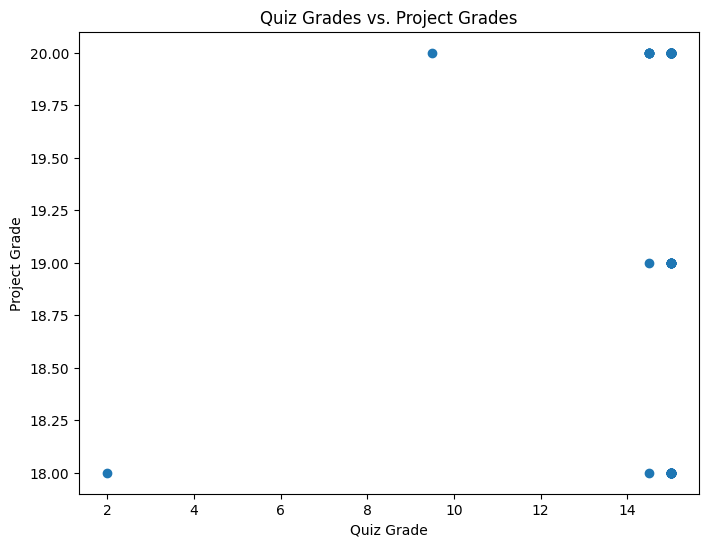

In [19]:
# @title Quiz Grades vs. Project Grades

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df2['درجة الكويز'], df2['درجة المشروع (20)'])
plt.title('Quiz Grades vs. Project Grades')
plt.xlabel('Quiz Grade')
_ = plt.ylabel('Project Grade')

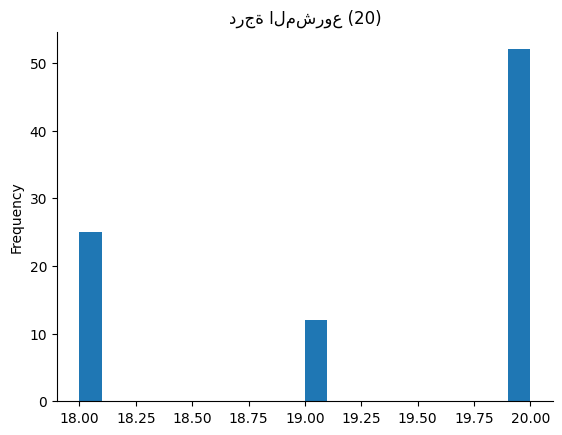

In [18]:
# @title درجة المشروع (20)

from matplotlib import pyplot as plt
df2['درجة المشروع (20)'].plot(kind='hist', bins=20, title='درجة المشروع (20)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
# Ensure both ID columns are of the same data type (string)
df['ID'] = df['ID'].astype(str)
df2['ID'] = df2['ID'].astype(str)

# Merge the "Grade/15.00" column from df1 into df2 based on the "ID" column
df2 = df2.merge(df[['ID', 'Grade/15.00']], on='ID', how='left')




In [17]:

df2.head(3)


In [16]:
df2.isnull().sum()

,0
N,0
Name,0
ID,0
SN,0
درجة أعمال السنة (5),0
درجة المشروع (20),1
درجة الكويز,1
Grade/15.00,12


In [17]:
# Save df2 to a CSV file
df2.to_csv('/content/drive/MyDrive/NMU/bigdatagrades/output.csv', index=False, encoding='utf-8-sig')

print("DataFrame saved as 'output.csv'")

DataFrame saved as 'output.csv'
